# Harry Wu

## Research question/interests

**I would like to explore the correlations between Air bnb pricing and rent-out frequencies to find out what is the optimum price point for Air bnb house owners to price their rental in each major cities.**
**I am also interested in seeing if there is a correlation between rental price & density. Specifically, this could be done by comparing prices from neighbourhoods that have a lot of air bnb rentals versus the ones that have barely any rentals.**


### Analysis Plan:
1. Import data set of each city and ensure that everything is readable under pandas.
1. Drop a few irrelevant columns, such as neighbourhood group(with too many NaN), to clean up the data.
1. Consolidate the 3 processed datasets for combined analysis on Air BnB data on the three different cities. This would mean that we will have to add an extra column indicating the city in each of our file.
1. Think about the appropriate graph(s) for presenting and analyzing our data, and apply them.
1. To come up with answers to our questions at the end of the project.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../data/raw/tokyo_listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.717070,139.826080,Entire home/apt,11000,3,168,2022-12-07,1.22,1,120,3,M130003350
1,5080877,Decoboco( Artist's Studio the second floor),21769906,Decoboco,NaN,Koto Ku,35.681620,139.818590,Entire home/apt,6500,1,234,2020-02-27,2.43,2,0,0,Hotels and Inns Business Act | 江東区保健所 | ３０江健生環...
2,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.738440,139.769170,Private room,9341,3,230,2022-07-09,1.87,1,212,2,M130000243
3,5128293,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,8142772,Min & Haru,NaN,Shinjuku Ku,35.698720,139.702760,Shared room,5727,2,144,2022-12-25,1.50,11,165,10,M130002186
4,1016831,5 mins Shibuya Cat modern sunny Shimokita,5596383,Wakana,NaN,Setagaya Ku,35.658000,139.671340,Private room,17003,1,224,2022-12-25,1.89,1,67,13,M130001107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9781,785727667353193549,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,219636782,Yuka,NaN,Toshima Ku,35.726207,139.715311,Entire home/apt,25429,3,0,NaN,NaN,19,177,0,Hotels and Inns Business Act | 豊島区池袋保健所 | 29豊池...
9782,785739075327298317,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,219636782,Yuka,NaN,Toshima Ku,35.727220,139.715260,Entire home/apt,22857,3,0,NaN,NaN,19,177,0,Hotels and Inns Business Act | 豊島区池袋保健所 | 29豊池...
9783,785746929098287704,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,219636782,Yuka,NaN,Toshima Ku,35.724670,139.717340,Entire home/apt,45429,3,0,NaN,NaN,19,171,0,Hotels and Inns Business Act | 豊島区池袋保健所 | 29豊池...
9784,785766037705515417,208東京赤羽站步行4分池袋9分新宿14分上野10分 免费存行李箱！微：hefuyan7190,154507729,福艷,NaN,Kita Ku,35.776760,139.716960,Entire home/apt,7857,2,0,NaN,NaN,30,178,0,M130032467


In [35]:
df.describe()
# looks like there are a few irrelevant columns in the dataset, will clean up in df_clean

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.786000e+03,9.786000e+03,0.0,9786.000000,9786.000000,9.786000e+03,9786.000000,9786.000000,8390.000000,9786.000000,9786.000000,9786.000000
mean,1.226844e+17,2.214446e+08,NaN,35.698058,139.737664,2.439311e+04,2.627325,32.150623,1.154415,13.837932,138.605866,7.963008
std,2.674419e+17,1.352475e+08,NaN,0.039771,0.072689,5.311154e+04,13.448947,53.032852,1.361996,16.307022,106.447619,15.272917
min,1.976770e+05,3.222340e+05,NaN,35.540630,139.157320,0.000000e+00,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000
25%,3.202411e+07,9.430273e+07,NaN,35.688493,139.700832,1.000000e+04,1.000000,2.000000,0.370000,4.000000,55.000000,0.000000
50%,4.205199e+07,2.281334e+08,NaN,35.703500,139.732675,1.586400e+04,1.000000,11.000000,0.820000,8.000000,117.000000,3.000000
75%,5.169673e+07,3.258108e+08,NaN,35.719083,139.789017,2.661400e+04,2.000000,40.000000,1.470000,18.000000,213.000000,9.000000
max,7.918254e+17,4.929537e+08,NaN,35.830640,139.911580,2.146286e+06,1000.000000,1268.000000,31.320000,98.000000,365.000000,462.000000


In [36]:
df_clean = df.drop(['id','host_id','neighbourhood_group', 'license'],axis=1)
df_clean
# I think I will start by plotting a heat map that shows the price and density of rentals around tokyo. 

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Oshiage Holiday Apartment,Yoshimi & Marek,Sumida Ku,35.717070,139.826080,Entire home/apt,11000,3,168,2022-12-07,1.22,1,120,3
1,Decoboco( Artist's Studio the second floor),Decoboco,Koto Ku,35.681620,139.818590,Entire home/apt,6500,1,234,2020-02-27,2.43,2,0,0
2,Kero-kero house room 1,Kei,Kita Ku,35.738440,139.769170,Private room,9341,3,230,2022-07-09,1.87,1,212,2
3,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,Min & Haru,Shinjuku Ku,35.698720,139.702760,Shared room,5727,2,144,2022-12-25,1.50,11,165,10
4,5 mins Shibuya Cat modern sunny Shimokita,Wakana,Setagaya Ku,35.658000,139.671340,Private room,17003,1,224,2022-12-25,1.89,1,67,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9781,3mins to Ikebukuro sta./Max5/9min toShinjuku b...,Yuka,Toshima Ku,35.726207,139.715311,Entire home/apt,25429,3,0,NaN,NaN,19,177,0
9782,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Yuka,Toshima Ku,35.727220,139.715260,Entire home/apt,22857,3,0,NaN,NaN,19,177,0
9783,3mins to Ikebukuro sta./Max7/9min toShinjuku b...,Yuka,Toshima Ku,35.724670,139.717340,Entire home/apt,45429,3,0,NaN,NaN,19,171,0
9784,208東京赤羽站步行4分池袋9分新宿14分上野10分 免费存行李箱！微：hefuyan7190,福艷,Kita Ku,35.776760,139.716960,Entire home/apt,7857,2,0,NaN,NaN,30,178,0


In [37]:
df_clean['latitude'].max(),df_clean['longitude'].max()

(35.83064, 139.91158)

In [38]:
df_clean['latitude'].min(),df_clean['longitude'].min()

(35.54063, 139.15732)

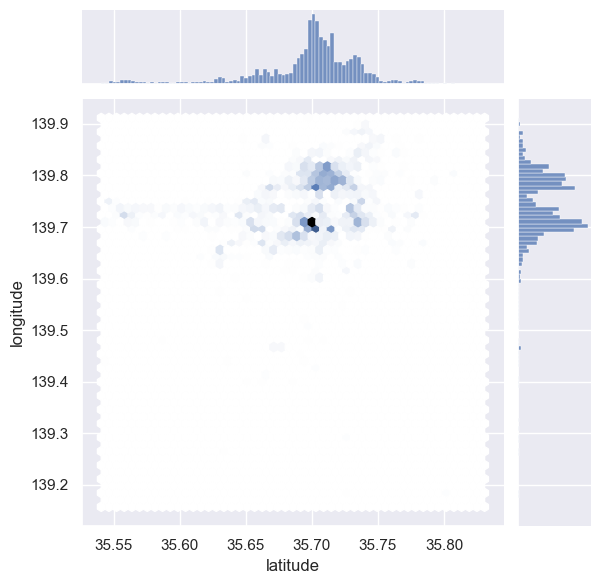

In [39]:
sns.jointplot(x=df["latitude"], y=df["longitude"], kind='hex')
plt.show()
#looks like Tokyo's airbnb rentals are very concentrated in one geographical area. This may be due to Tokyo's small urban area, large scale in measuring the latitude and longitude data, or specific tourist attractions.

In [40]:
sorted(df_clean["neighbourhood"].unique().tolist())
# but there are many unique neighbourhood. So I decided to see how many listings each neighbourhood has.

['Adachi Ku',
 'Akiruno Shi',
 'Akishima Shi',
 'Arakawa Ku',
 'Bunkyo Ku',
 'Chiyoda Ku',
 'Chofu Shi',
 'Chuo Ku',
 'Edogawa Ku',
 'Fuchu Shi',
 'Fussa Shi',
 'Hachioji Shi',
 'Hamura Shi',
 'Higashimurayama Shi',
 'Hino Shi',
 'Itabashi Ku',
 'Katsushika Ku',
 'Kita Ku',
 'Kodaira Shi',
 'Koganei Shi',
 'Kokubunji Shi',
 'Komae Shi',
 'Koto Ku',
 'Kunitachi Shi',
 'Machida Shi',
 'Meguro Ku',
 'Minato Ku',
 'Mitaka Shi',
 'Musashimurayama Shi',
 'Musashino Shi',
 'Nakano Ku',
 'Nerima Ku',
 'Nishitokyo Shi',
 'Okutama Machi',
 'Ome Shi',
 'Ota Ku',
 'Setagaya Ku',
 'Shibuya Ku',
 'Shinagawa Ku',
 'Shinjuku Ku',
 'Suginami Ku',
 'Sumida Ku',
 'Tachikawa Shi',
 'Taito Ku',
 'Tama Shi',
 'Toshima Ku']

In [41]:
df_gbn=df_clean.groupby('neighbourhood').count().reset_index()
df_gbn


,neighbourhood,name,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Adachi Ku,94,94,94,94,94,94,94,94,64,64,94,94,94
1,Akiruno Shi,9,9,9,9,9,9,9,9,8,8,9,9,9
2,Akishima Shi,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Arakawa Ku,200,200,200,200,200,200,200,200,146,146,200,200,200
4,Bunkyo Ku,160,160,160,160,160,160,160,160,132,132,160,160,160
5,Chiyoda Ku,173,173,173,173,173,173,173,173,130,130,173,173,173
6,Chofu Shi,13,13,13,13,13,13,13,13,13,13,13,13,13
7,Chuo Ku,267,267,267,267,267,267,267,267,223,223,267,267,267
8,Edogawa Ku,191,191,191,191,191,191,191,191,166,166,191,191,191
9,Fuchu Shi,33,33,33,33,33,33,33,33,18,18,33,33,33


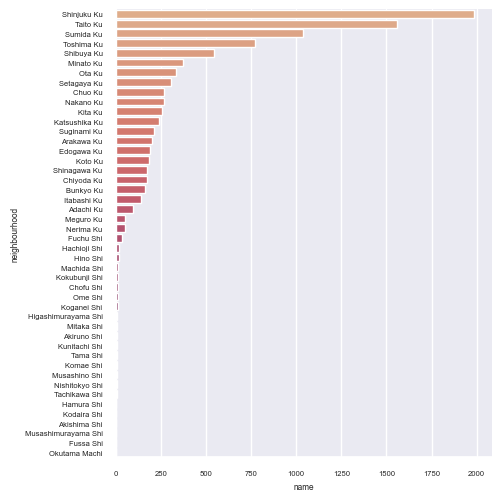

In [42]:
sns.set_theme(style="darkgrid", font_scale=0.5)
sns.catplot(data=df_gbn, y="neighbourhood", x="name", kind="bar",palette="flare",order=df["neighbourhood"].value_counts().index)
#looks like the majority of rentals are based in only a few neighbourhoods. However, the large number of neighbourhoods make it hard to read the graph.

In [43]:
#I am trying to pick the top 10 most concentrated neighbourhood for my analysis, assuming neighbourhoods with little to no rentals are unpopular for tourists.
n_top=df_gbn.nlargest(10,'name').reset_index(drop=True)
n_top = n_top.drop(index=n_top.index[10:]).reset_index(drop=True)
n_top


,neighbourhood,name,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Shinjuku Ku,1986,1986,1986,1986,1986,1986,1986,1986,1736,1736,1986,1986,1986
1,Taito Ku,1558,1558,1558,1558,1558,1558,1558,1558,1196,1196,1558,1558,1558
2,Sumida Ku,1039,1039,1039,1039,1039,1039,1039,1039,939,939,1039,1039,1039
3,Toshima Ku,770,770,770,770,770,770,770,770,678,678,770,770,770
4,Shibuya Ku,543,543,543,543,543,543,543,543,491,491,543,543,543
5,Minato Ku,371,371,371,371,371,371,371,371,337,337,371,371,371
6,Ota Ku,332,332,332,332,332,332,332,332,298,298,332,332,332
7,Setagaya Ku,306,306,306,306,306,306,306,306,273,273,306,306,306
8,Chuo Ku,267,267,267,267,267,267,267,267,223,223,267,267,267
9,Nakano Ku,266,266,266,266,266,266,266,266,255,255,266,266,266


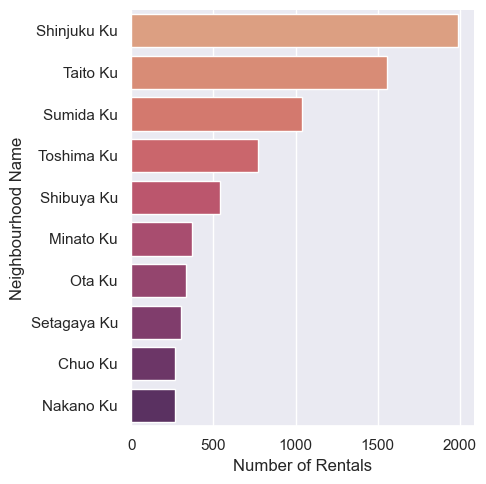

In [44]:
sns.set_theme(style="darkgrid", font_scale=1)
plot_by_tn=sns.catplot(data=n_top, y="neighbourhood", x="name", kind="bar",palette="flare",order=n_top["neighbourhood"].value_counts().index)
plot_by_tn.set_axis_labels("Number of Rentals", "Neighbourhood Name")
# now this looks a lot better! I will continue exploring with a focus on the 10 top neighbourhoods.

In [45]:
# doing a small trick to help me populate some repetitive coding:)
for i in range(0,10):
    print(f"df{i}=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][{i}]]")
    


df0=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][0]]
df1=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][1]]
df2=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][2]]
df3=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][3]]
df4=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][4]]
df5=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][5]]
df6=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][6]]
df7=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][7]]
df8=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][8]]
df9=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][9]]


In [46]:
#I want to make a ridge plot to identify the spread of rental pricing in each major neighbourhood, as well as identifying any outliers.
#I first start by compiling all relevant rows in the top 10 neighbourhoods into a new dataframe.

df0=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][0]]
df1=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][1]]
df2=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][2]]
df3=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][3]]
df4=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][4]]
df5=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][5]]
df6=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][6]]
df7=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][7]]
df8=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][8]]
df9=df_clean[df_clean['neighbourhood']==n_top['neighbourhood'][9]]

df_top=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9])

df_top.reset_index(drop=True)


,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,＊新宿・大久保徒歩圏内 コンビニ徒歩1分 屋上から夜景ビュー No3 ドミトリールーム,Min & Haru,Shinjuku Ku,35.698720,139.702760,Shared room,5727,2,144,2022-12-25,1.50,11,165,10
1,3rd floor penthouse @ heart of TKO,Masaharu,Shinjuku Ku,35.702630,139.741470,Entire home/apt,56143,2,171,2022-12-10,1.52,2,19,8
2,Heart of Shinjuku/Free Pocket Wifi/Homey^^,Koichi,Shinjuku Ku,35.693460,139.708230,Entire home/apt,10000,2,285,2021-04-11,3.01,4,0,0
3,＊新宿・大久保徒歩圏内＊無料Wi-Fi＊コンビニ徒歩1分＊屋上から夜景ビュー 個室(和室) B,Min & Haru,Shinjuku Ku,35.698570,139.704000,Private room,5850,2,168,2022-12-20,1.48,11,111,12
4,＊新宿・大久保徒歩圏内＊無料Wi-Fi＊コンビニ徒歩1分＊屋上から夜景ビュー 個室(和室) A,Min & Haru,Shinjuku Ku,35.698480,139.704320,Private room,5850,2,133,2022-06-26,1.18,11,84,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7433,301NewlyRenovated/Shinjuku6mins/EarlyCheckin/WIFI,Yuko,Nakano Ku,35.689386,139.673391,Entire home/apt,25000,1,0,NaN,NaN,6,121,0
7434,西新宿203 Kaishu's Cozy House,Hanako,Nakano Ku,35.698830,139.664460,Entire home/apt,37429,2,0,NaN,NaN,29,174,0
7435,[東京]新宿エリア JR＆地下鉄 中野駅6分 (1~5名)ビジネスや観光に長期滞在に人気,Kasumi,Nakano Ku,35.710451,139.669714,Entire home/apt,29286,7,1,2022-12-13,1.00,2,66,1
7436,西新宿202 Kaishu's cozy house,Hanako,Nakano Ku,35.700340,139.679860,Entire home/apt,24143,2,1,2022-12-18,1.00,29,172,1


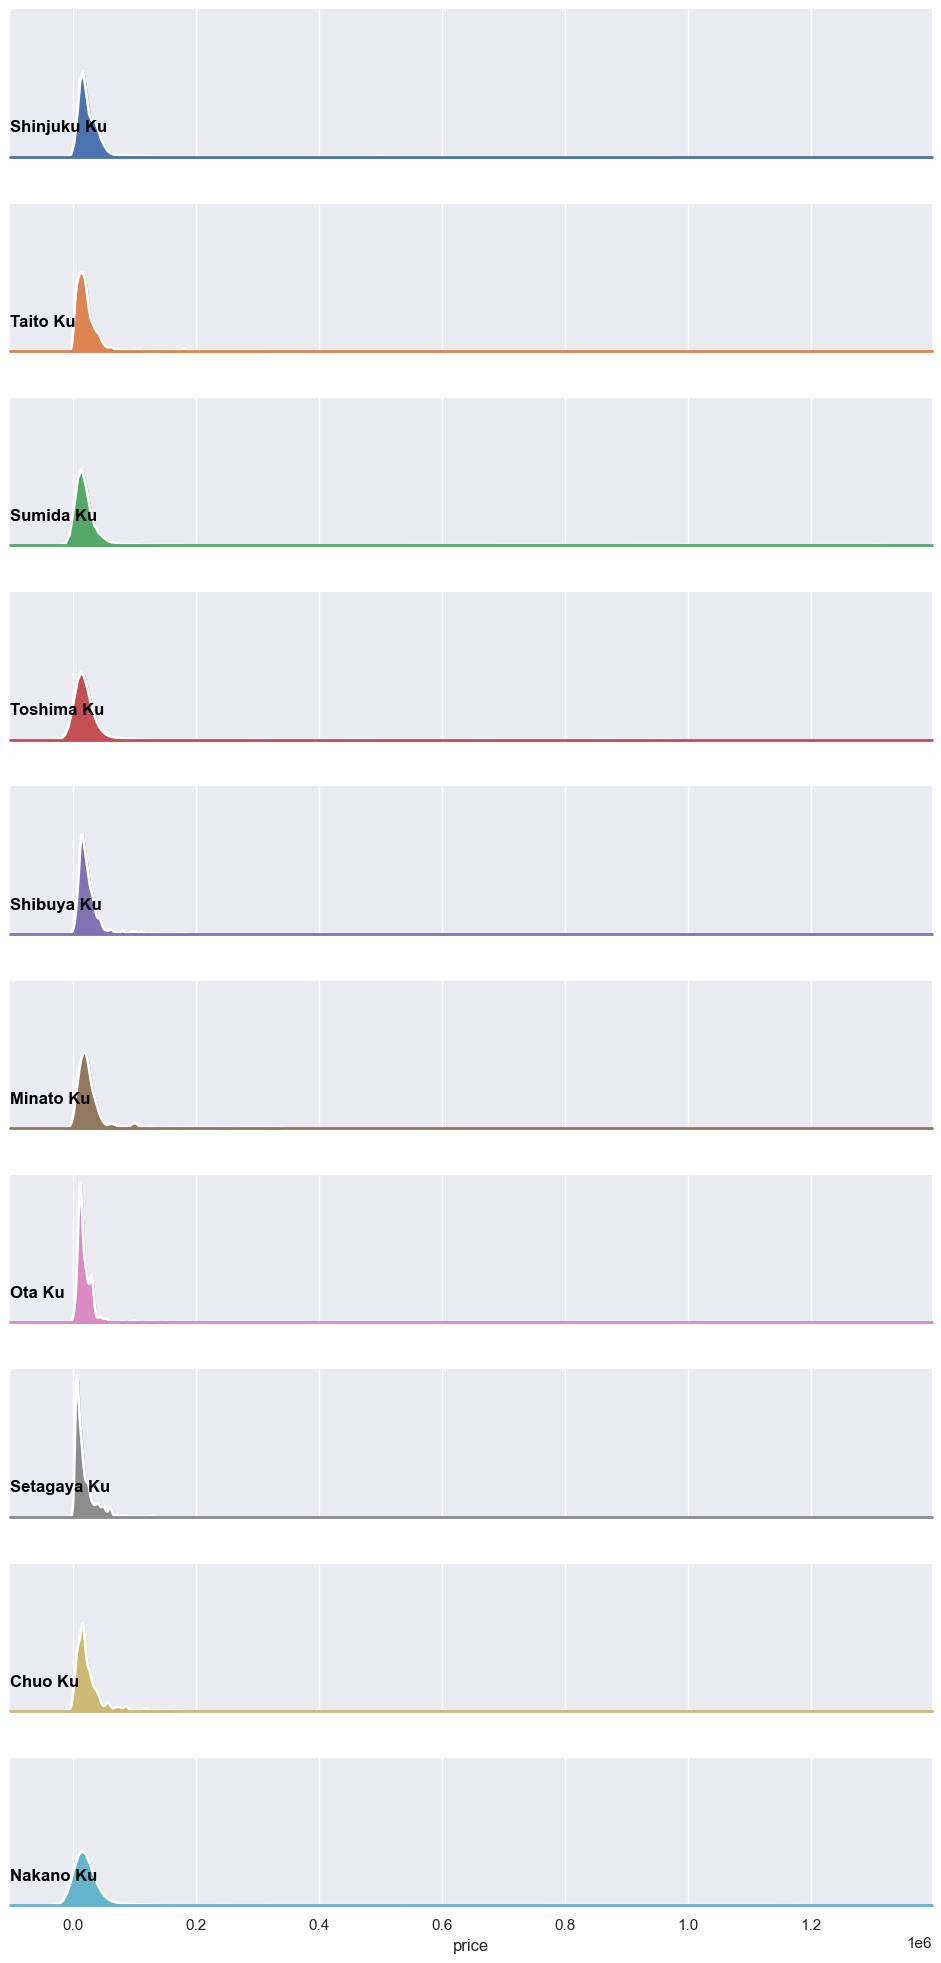

In [47]:
g = sns.FacetGrid(df_top, row="neighbourhood",hue="neighbourhood", aspect=5, height=2)

g.map(sns.kdeplot, "price",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "price", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "price")

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)



**Analysis for the graph above:**
- Looks like there are a few(not many) abnormally high prices included in the dataset. This may be currency conversion issue or just an error in airbnb's data.
- I need to consider setting a price ceiling and dropping those high values out of the dataset to continue my analysis.
- I think I will conclude my EDA here and leave the more detailed cleaning work to Milestone 4.

### Next Step

I made two new columns:
- **PricePerNight**, which calculates average price for each night stay using price divided by minimum nights.
- **Price_CAD**, which converts all the valid price data from JPY to CAD, exchange rate is based on the 2022 average JPY to CAD exchange rate per [Bank of Canada](https://www.bankofcanada.ca/rates/exchange/annual-average-exchange-rates/).

I have decided to drop irrelevant row that:
- has minimum nights above 30 days, which will be irrelevant for my research question since I believe an average tourist will not stay for more than a month in their trip to Tokyo. 
- has price equal to 0, since I don't think an Airbnb offers accommodation for free.
- has price per night above 100,000 JPY, which is equivalent to roughly 1,000 CAD, because these places are too costly and are potentially abnormal.


In [63]:

df_top=df_top.assign(PricePerNight=lambda x: x['price']/x['minimum_nights'])\
    .assign(Price_CAD=lambda x: x['price'] * 0.00994)\
    .drop(df_top[df_top['minimum_nights']>30].index)\
    .drop(df_top[df_top['price']==0].index)\
    .drop(df_top[df_top['PricePerNight']>1*10**5].index)\
    .reset_index(drop=True)
     
df_top.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,Price_CAD,PricePerNight
count,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000,6305.000000,7278.000000,7278.000000,7278.000000,7278.000000,7278.000000
mean,35.693876,139.739272,20947.459742,2.058945,32.078318,1.176590,15.098928,139.029816,8.290052,208.217750,15701.615194
std,0.036674,0.048579,15224.081969,3.401972,52.902486,1.324541,17.500022,105.631851,14.634959,151.327375,14172.534496
min,35.540630,139.594850,1410.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.000000,14.015400,47.000000
25%,35.688333,139.700418,10894.000000,1.000000,2.000000,0.380000,4.000000,56.000000,0.000000,108.286360,6000.000000
50%,35.702170,139.727050,16702.000000,1.000000,12.000000,0.840000,9.000000,117.000000,4.000000,166.017880,11700.000000
75%,35.714627,139.786935,27016.500000,2.000000,40.000000,1.510000,20.000000,217.000000,10.000000,268.544010,20143.000000
max,35.744420,139.831290,99999.000000,30.000000,1268.000000,24.030000,98.000000,365.000000,262.000000,993.990060,99999.000000


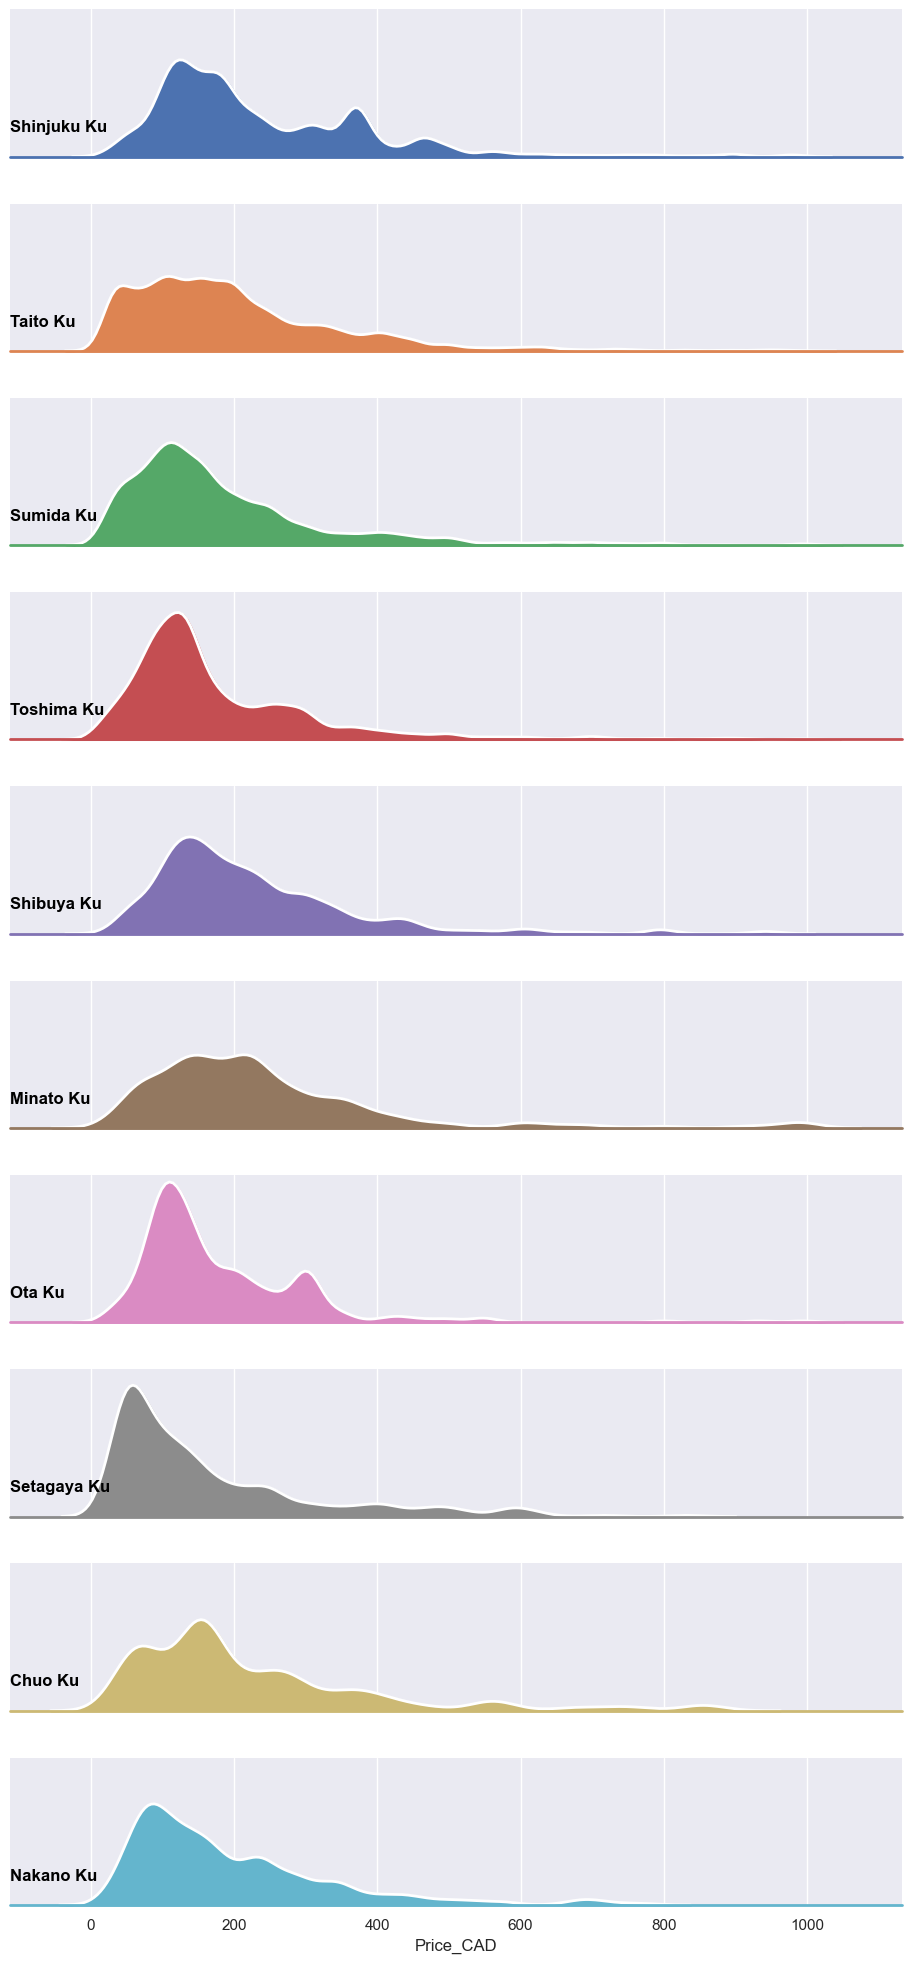

In [64]:
g = sns.FacetGrid(df_top, row="neighbourhood",hue="neighbourhood", aspect=5, height=2)

g.map(sns.kdeplot, "Price_CAD",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Price_CAD", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Price_CAD")

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)